# Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

# Importing the Data

In [ ]:
df=pd.read_csv('/content/players_20.csv')

# Exploratory Data Analysis

In [ ]:
df.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [ ]:
df.shape

(18278, 104)

In [ ]:
for i in df.columns:
  print(i)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [ ]:
df.nationality.value_counts()[:20]

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
Brazil                  824
Italy                   732
Colombia                591
Japan                   453
Netherlands             416
China PR                373
Chile                   370
Sweden                  358
Norway                  350
Republic of Ireland     348
United States           347
Denmark                 345
Portugal                344
Mexico                  340
Poland                  324
Name: nationality, dtype: int64

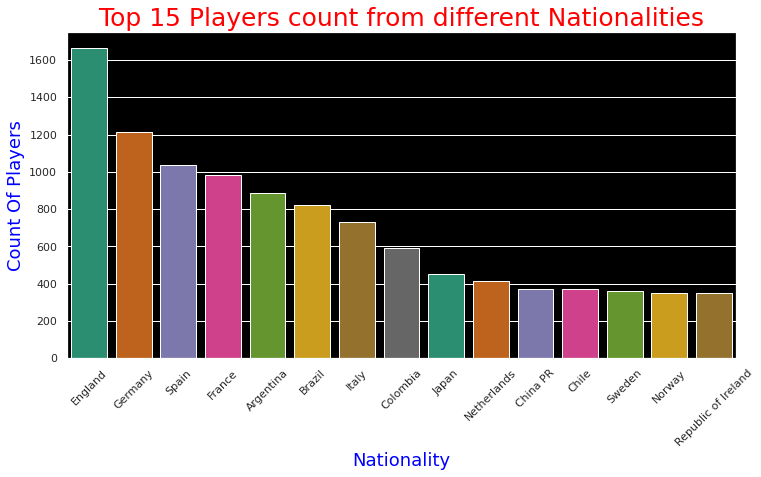

In [ ]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(12, 6))
sns.barplot(
    x = df.nationality.value_counts()[:15].index,
    y = df.nationality.value_counts()[:15],palette='Dark2'
)
plt.xlabel("Nationality", color='blue', fontsize=18)
plt.ylabel("Count Of Players", color='blue', fontsize=18)
plt.xticks(rotation=45)
plt.title('Top 15 Players count from different Nationalities',color='red',fontsize=25)
plt.show()

In [ ]:
player_salary = df[["short_name", "wage_eur"]].sort_values(by="wage_eur", ascending=False).reset_index(drop=True)

In [ ]:
player_salary[:20]

,short_name,wage_eur
0,L. Messi,565000
1,E. Hazard,470000
2,Cristiano Ronaldo,405000
3,K. De Bruyne,370000
4,A. Griezmann,370000
5,L. Suárez,355000
6,L. Modrić,340000
7,T. Kroos,330000
8,S. Agüero,300000
9,Sergio Busquets,300000


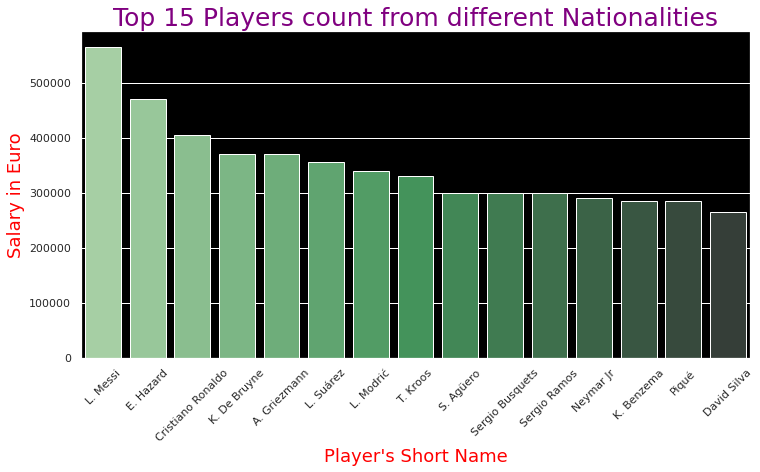

In [ ]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(12, 6))
sns.barplot(
    x = "short_name",
    y = "wage_eur",
    data = player_salary[:15],palette='Greens_d'
)
plt.xlabel("Player's Short Name",color='red', fontsize=18)
plt.ylabel("Salary in Euro",color='red', fontsize=18)
plt.title('Top 15 Players count from different Nationalities',color='purple',fontsize=25)
plt.xticks(rotation=45)
plt.show()

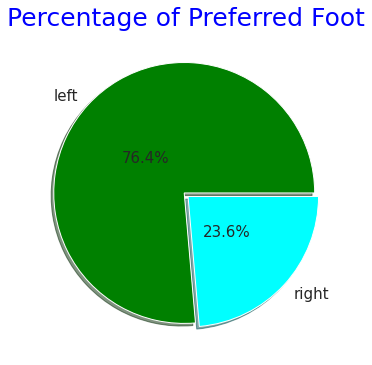

In [ ]:
plt.figure(figsize=(8,6))
labels = ["left",'right']
values=df['preferred_foot'].value_counts().values
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,colors=['green','cyan'],explode=(0.02,0.02),pctdistance=0.4,textprops ={'fontsize':15})
        
plt.title('Percentage of Preferred Foot',color='blue',fontsize=25)
plt.show()

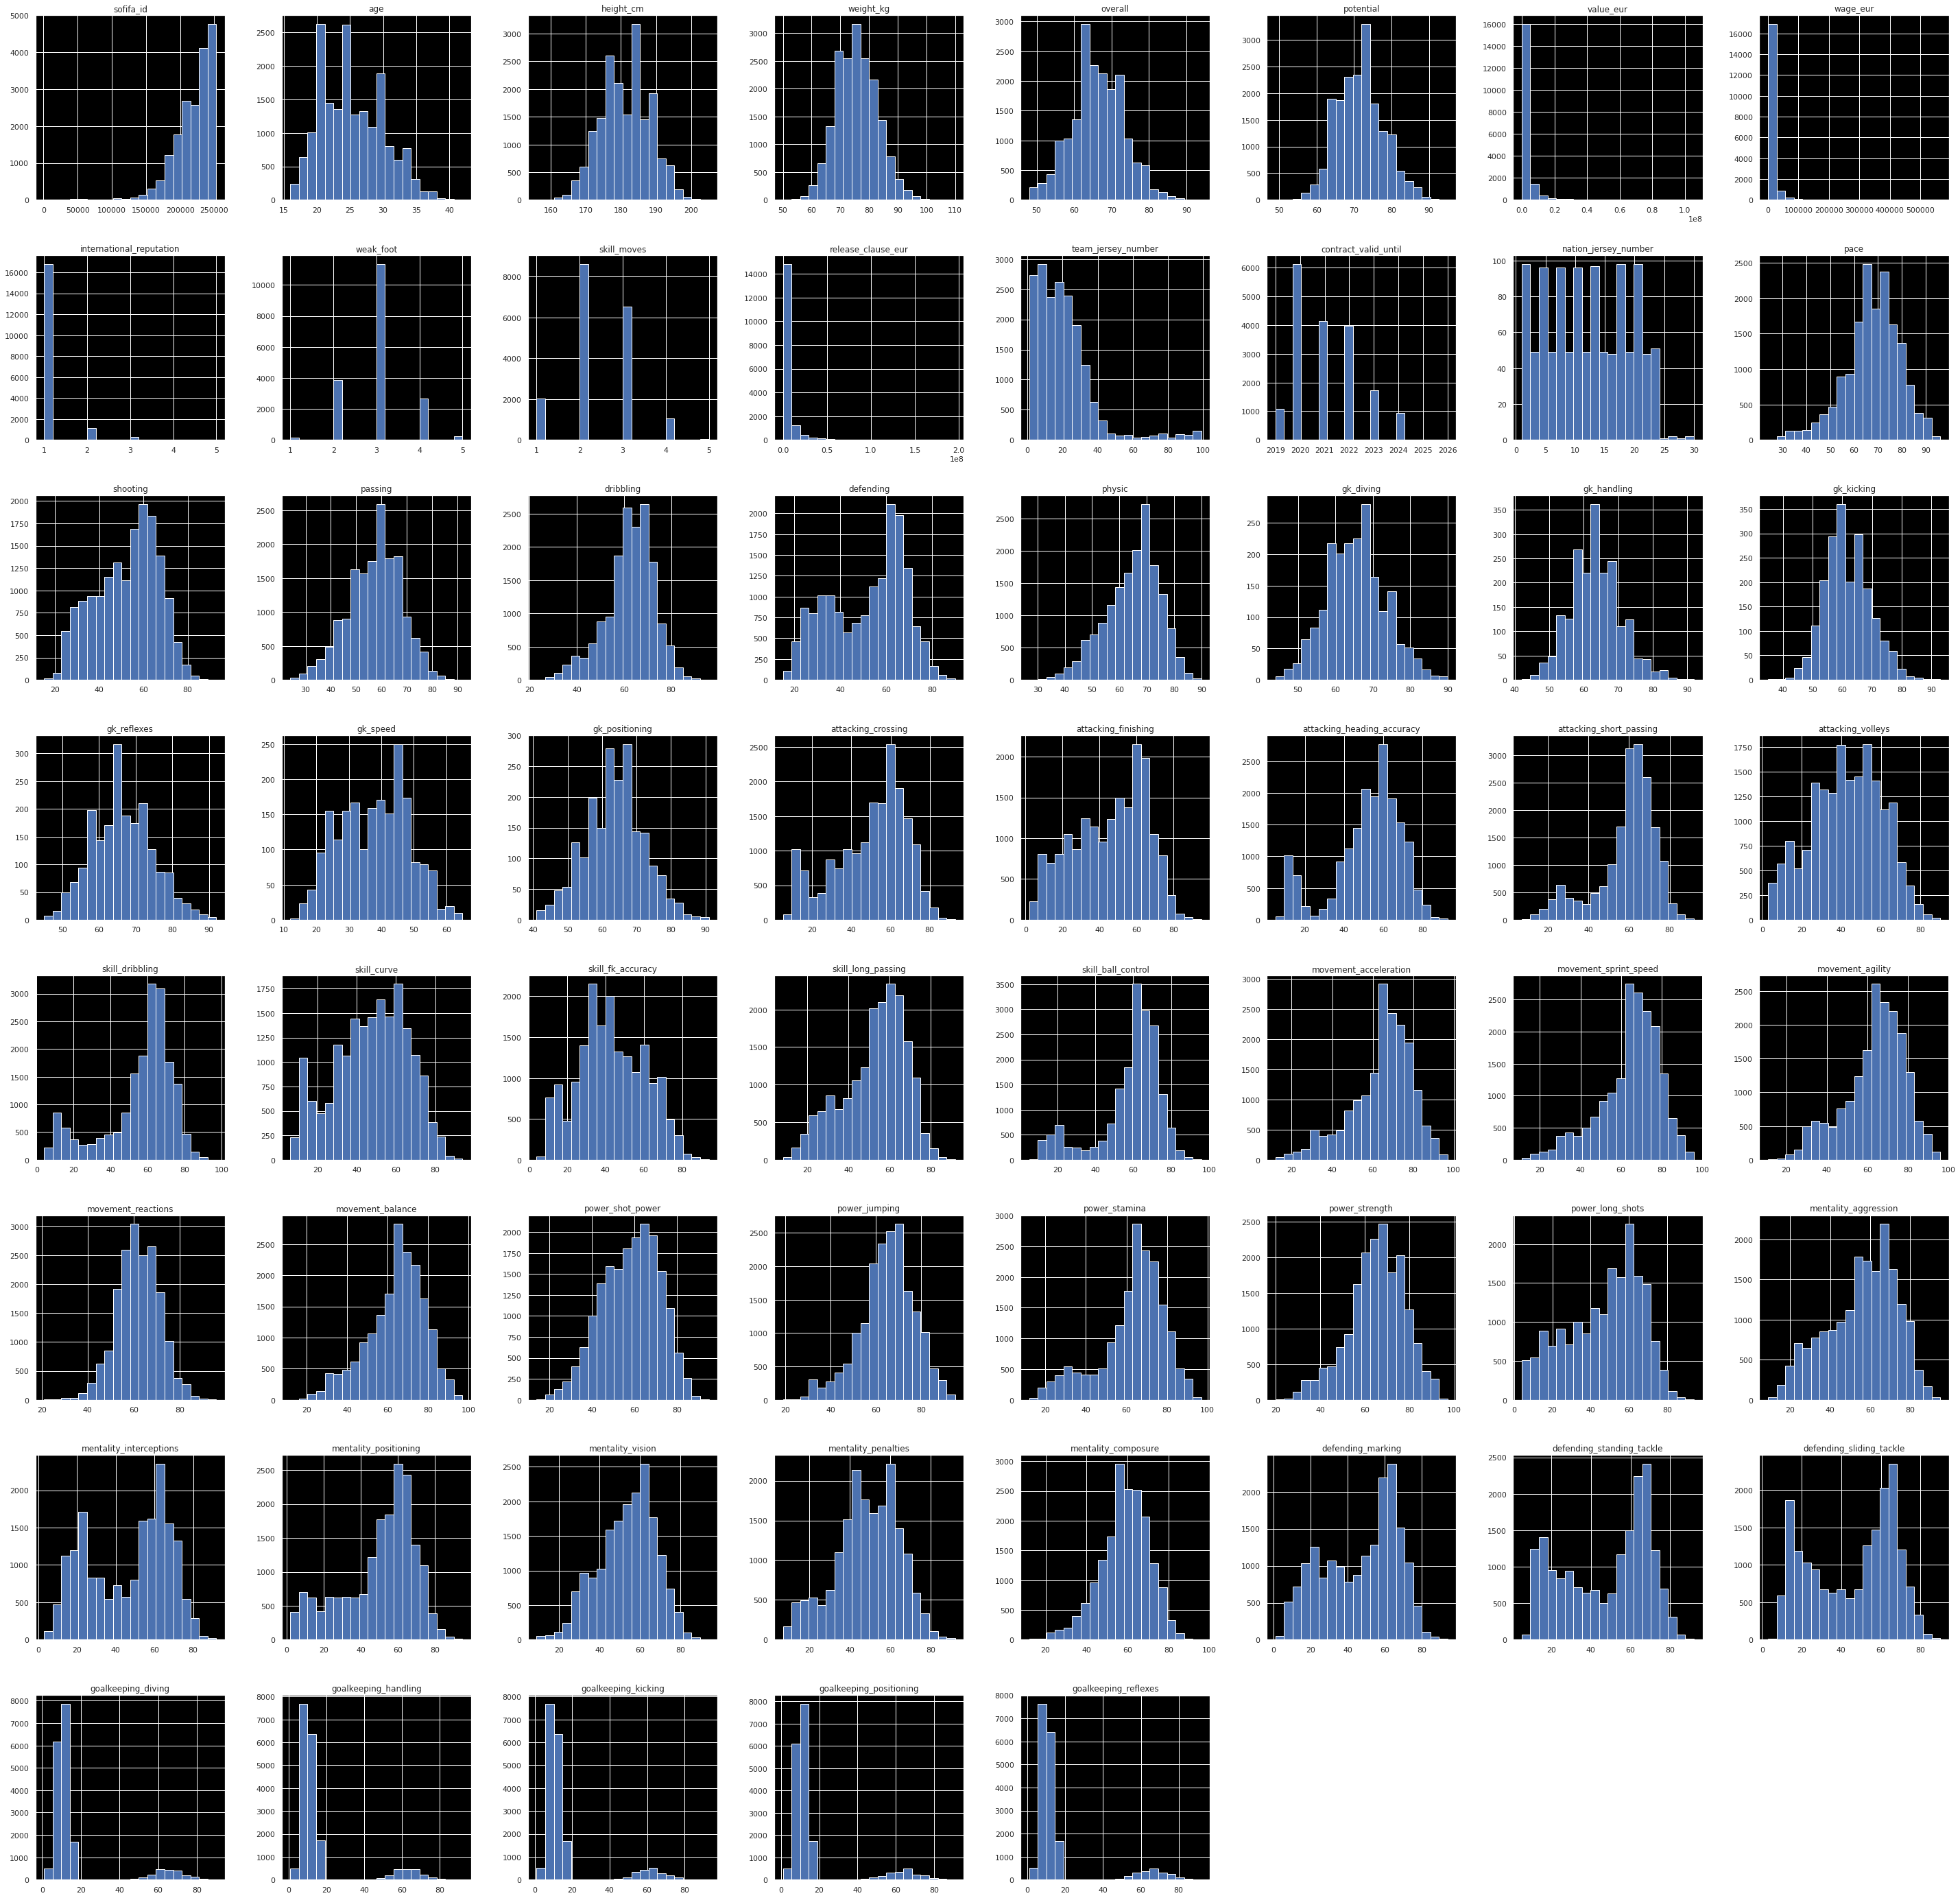

In [ ]:

df.hist(bins=20,figsize=(50,50))
plt.show()

# Data Preprocessing

In [ ]:
df2=df.describe().columns

In [ ]:
fifa=df[df2]

In [ ]:
fifa.head(2)

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11


In [ ]:
fifa['name']=df['short_name']

In [ ]:
fifa.drop('sofifa_id',axis=1,inplace=True)

In [ ]:
fifa['overall'].mean()

66.24499398183609

In [ ]:
fifa=fifa[fifa.overall > 86]

In [ ]:
fifa.shape

(55, 61)

In [ ]:
fifa.isna().sum()

age                        0
height_cm                  0
weight_kg                  0
overall                    0
potential                  0
                          ..
goalkeeping_handling       0
goalkeeping_kicking        0
goalkeeping_positioning    0
goalkeeping_reflexes       0
name                       0
Length: 61, dtype: int64

In [ ]:
names=fifa.name.tolist()

In [ ]:
fifa.drop('name',axis=1,inplace=True)

In [ ]:
fifa=fifa.fillna(df.mean())

### Feature Scaling

In [ ]:
scaler=MinMaxScaler()
x_scale=scaler.fit_transform(fifa)
x_norm=pd.DataFrame(x_scale, columns=fifa.columns)

In [ ]:
x_norm

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.857143,0.194444,0.351351,1.000000,0.875,0.885057,1.000000,1.000000,0.75,0.75,1.000000,0.300000,0.25,0.529265,0.833333,0.984615,1.000000,1.000000,0.120690,0.452381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.939024,1.000000,0.731707,1.000000,0.974684,1.000000,1.000000,1.000000,1.000000,1.0000,0.913793,0.781818,0.949153,0.933333,1.000000,0.795455,0.584615,0.661538,0.517857,1.000000,0.367647,0.358025,0.988235,1.000000,0.810127,1.000000,0.227848,0.329268,0.219512,0.034483,0.089888,0.142857,0.116279,0.056180
1,1.000000,0.666667,0.648649,0.857143,0.750,0.459770,0.648352,1.000000,0.75,1.00,0.385520,0.200000,0.50,0.285714,0.888889,1.000000,0.736842,0.805556,0.051724,0.738095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.890244,0.988235,0.963415,0.854839,0.962025,0.908046,0.853659,0.785714,0.741379,0.9500,0.879310,0.909091,0.847458,1.000000,0.600000,1.000000,1.000000,0.815385,0.696429,0.988095,0.588235,0.222222,1.000000,0.812500,0.936709,0.967742,0.164557,0.268293,0.195122,0.045977,0.089888,0.142857,0.116279,0.089888
2,0.500000,0.333333,0.243243,0.714286,0.625,1.000000,0.395604,1.000000,1.00,1.00,0.996287,0.300000,0.50,0.428571,0.907407,0.876923,0.868421,0.972222,0.000000,0.261905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.926829,0.905882,0.634146,0.919355,0.962025,0.988506,0.939024,0.916667,0.810345,0.9875,0.965517,0.872727,1.000000,0.733333,0.816667,0.659091,0.476923,0.753846,0.178571,0.880952,0.411765,0.308642,0.905882,0.937500,1.000000,0.935484,0.151899,0.195122,0.256098,0.068966,0.067416,0.142857,0.127907,0.089888
3,0.428571,0.694444,0.756757,0.571429,0.750,0.678161,0.032967,0.333333,0.50,0.00,0.807550,0.400000,0.75,0.000000,0.475943,0.373820,0.085099,0.070322,0.337129,0.425635,0.877938,1.000000,0.518729,0.882856,0.563516,1.000000,0.024390,0.011765,0.060976,0.209677,0.025316,0.022989,0.024390,0.047619,0.103448,0.1750,0.086207,0.345455,0.508475,0.466667,0.233333,0.181818,0.738462,0.138462,0.696429,0.023810,0.161765,0.098765,0.011765,0.546875,0.000000,0.096774,0.151899,0.024390,0.121951,0.965517,1.000000,0.835165,1.000000,0.966292
4,0.571429,0.333333,0.405405,0.571429,0.500,0.821839,0.791209,0.666667,0.75,0.75,0.930074,0.200000,1.00,0.428571,0.907407,0.846154,0.842105,0.944444,0.051724,0.452381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.853659,0.870588,0.621951,0.951613,0.911392,0.977011,0.878049,0.821429,0.844828,0.9750,0.965517,0.854545,0.983051,0.600000,0.983333,0.704545,0.400000,0.800000,0.428571,0.833333,0.455882,0.370370,0.905882,0.921875,0.974684,0.838710,0.240506,0.207317,0.170732,0.091954,0.101124,0.043956,0.046512,0.056180
5,0.571429,0.500000,0.297297,0.571429,0.500,0.821839,0.571429,0.666667,1.00,0.75,0.818688,0.533333,0.75,0.285714,0.629630,0.892308,1.000000,0.722222,0.500000,0.738095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.847059,0.548780,1.000000,0.898734,0.873563,0.902439,0.869048,0.982759,0.9375,0.672414,0.636364,0.694915,0.666667,0.683333,0.909091,0.507692,0.876923,0.625000,0.952381,0.779

### Using PCA to reduce 60 columns into 2

In [ ]:
pca=PCA(n_components=2)
dim_reduce=pca.fit_transform(x_norm)

In [ ]:
reduced=pd.DataFrame(dim_reduce)

In [ ]:
reduced

,0,1
0,-1.528319,-1.358693
1,-1.233176,-0.952752
2,-1.349761,-1.526103
3,3.513043,-0.673008
4,-1.248611,-1.301530
5,-1.312904,-0.371876
6,3.359434,-0.508420
7,-0.235644,1.240537
8,-1.231263,0.057058
9,-1.111630,-0.800739


### Hierarchical Clustering with Complete Linkage

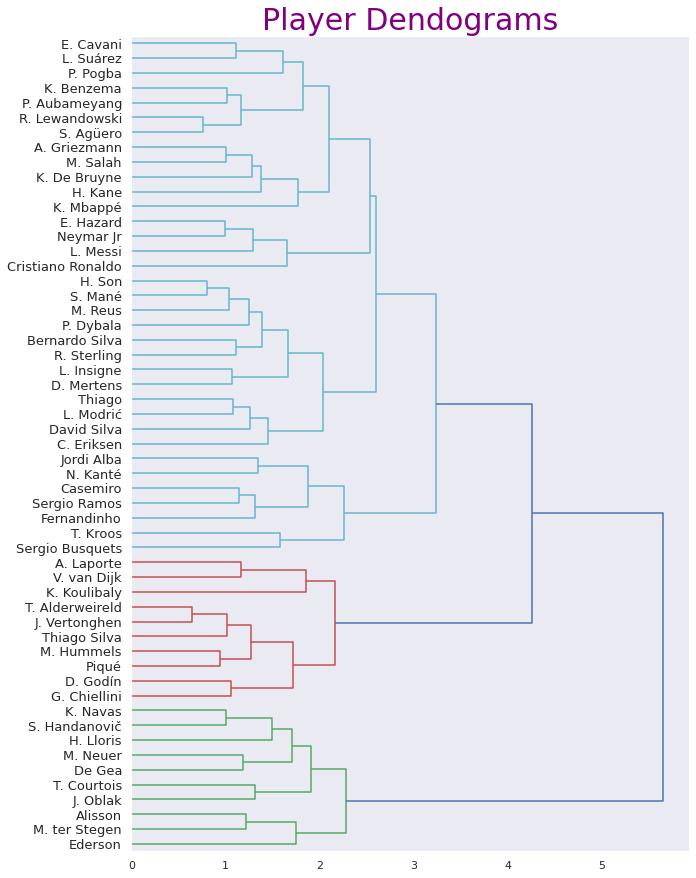

In [ ]:

sns.set(style='dark')
plt.figure(figsize=(10,15))
plt.title("Player Dendograms",fontsize=30, color='purple')
shc.dendrogram(shc.linkage(x_norm, method='complete'),labels=names,leaf_font_size=13,orientation='right')
plt.show()

In [ ]:


agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg=agg.fit(reduced)

In [ ]:
labels=agg.fit_predict(reduced)

clusters= agg.labels_.tolist()

In [ ]:
reduced['names'] = names
reduced['cluster']= clusters

reduced.columns=['x','y','names','clusters']
reduced.head()

,x,y,names,clusters
0,-1.528319,-1.358693,L. Messi,1
1,-1.233176,-0.952752,Cristiano Ronaldo,1
2,-1.349761,-1.526103,Neymar Jr,1
3,3.513043,-0.673008,J. Oblak,3
4,-1.248611,-1.301530,E. Hazard,1


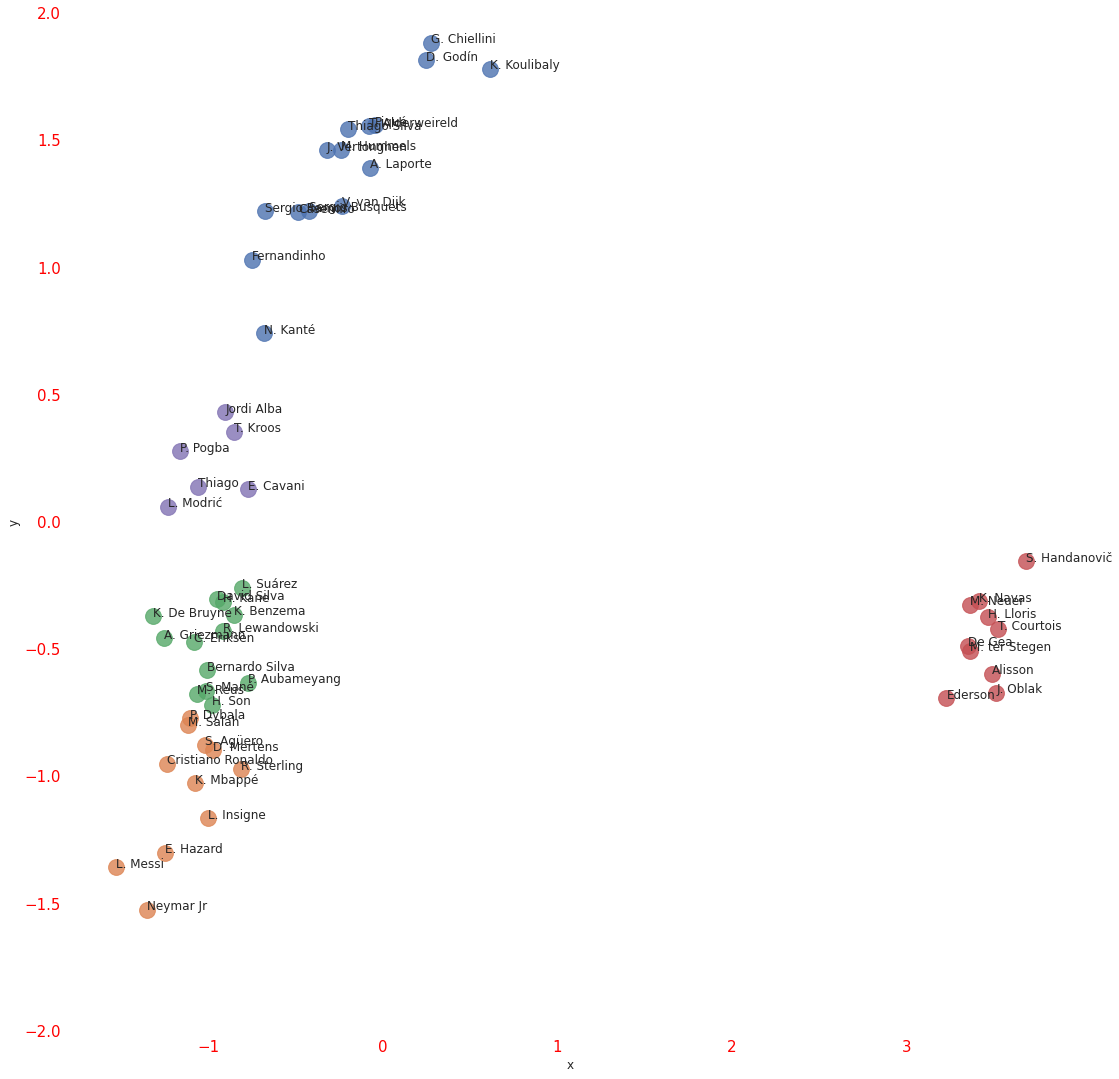

In [ ]:
sns.set(rc={'axes.facecolor':'white'})
ax= sns.lmplot(x='x',y='y',data=reduced,legend=False,hue='clusters',size= 15,scatter_kws={'s':250},fit_reg=False)
text=[]
for i,j,k in zip(reduced.x,reduced.y,reduced.names):
  text.append(plt.text(i,j,k))
ax.set(ylim=(-2,2))
plt.tick_params(labelsize=15,colors='red')
plt.show()